In [1]:
!pip install dbutils
!pip install domain_utils
!pip install pandas
!pip install whois
# !pip install pythonwhois

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [35]:
import constants
import pandas as pd
import requests
import numpy as np
import dbutils
import domain_utils
import socket
import requests 
import time
import os
import whois
import glob
from random import randrange
from matplotlib import pyplot as plt 

In [36]:
def func_get_tld_info(l_filename, list_of_tld):
    tld_data = pd.DataFrame(columns=["TLD", "Org", "Country"])

    for tld in list_of_tld:
        print("Looking up TLD - " + tld)
        # whois does not support the .google TLD domain
        # Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co
        # .co_il  .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl
        # .game .global_  .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me
        # .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt
        # .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre
        # .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za
        if tld == 'dns.google':
            tld_data = tld_data.append({'TLD': tld, 'Org': "Google LLC", 'Country': 'US'},
                                       ignore_index=True)
        else:
            i_count = 0
            while i_count < constants.WHOIS_LOOKUP_COUNT:
                t_sec = randrange(constants.WHOIS_LOOKUP_WAIT_MIN, constants.WHOIS_LOOKUP_WAIT_MAX)
                try:
                    domain = whois.query(tld)
                    tld_data = tld_data.append(
                        {'TLD': tld, 'Org': domain.registrant, 'Country': domain.registrant_country},
                        ignore_index=True)
                    i_count = constants.WHOIS_LOOKUP_COUNT
                except:     # noinspection PyBroadException
                    print("Error with Whois lookup. Waiting " + str(t_sec) + " seconds")
                time.sleep(t_sec)  # need a slight delay between requests for WHOIS info
                i_count += 1
    tld_data.to_csv(cwd + "/Output/Stage2/Host_Info/" + l_filename + '.csv', index=False)
    return tld_data

In [37]:
cwd = os.getcwd()
print(cwd)

/home/dietpi/MitM


In [38]:
filenames = sorted(glob.glob('/home/dietpi/MitM/Output/Stage1/*.csv'))
for file in filenames:
    print(file)

/home/dietpi/MitM/Output/Stage1/Stock_Google_Android.csv
/home/dietpi/MitM/Output/Stage1/mitmproxy_Wire.csv


In [39]:
ignore_list = ['knight22.com', '10.0.0.31', '10.0.0.2', 'local']

In [53]:
# path="/home/dietpi/MitM/Output/Stage1/Lineage_with_GPS_signed.csv"
path="/home/dietpi/MitM/Output/Stage1/Stock_Google_Android.csv"
#path="/home/dietpi/MitM/Output/Stage1/mitmproxy_2021_12_31_13_20.csv"
#path="/home/dietpi/MitM/Output/Stage1/mitmproxy_2022_01_07_23_01_Lineage_with_GPS.csv"
#path="/home/dietpi/MitM/Output/Stage1/mitmproxy_2022_01_09_22_16.csv"

In [54]:
# Extract filename for saving files
base = os.path.basename(path)
filename = os.path.splitext(base)[0]
print(filename)

Stock_Google_Android


In [55]:
mitm_data = pd.read_csv(path)

In [56]:
# Using pandas.DataFrame.fillna() to replace nan values 
mitm_data = mitm_data.fillna("")
#print(mitm_data)

In [57]:
# filter out local traffic
for filter in ignore_list:
    mitm_data = mitm_data[mitm_data.TLD != filter]

Processing Application
Processing URL
Processing TLD
Processing UserAgent
Processing Host
Processing Metadata


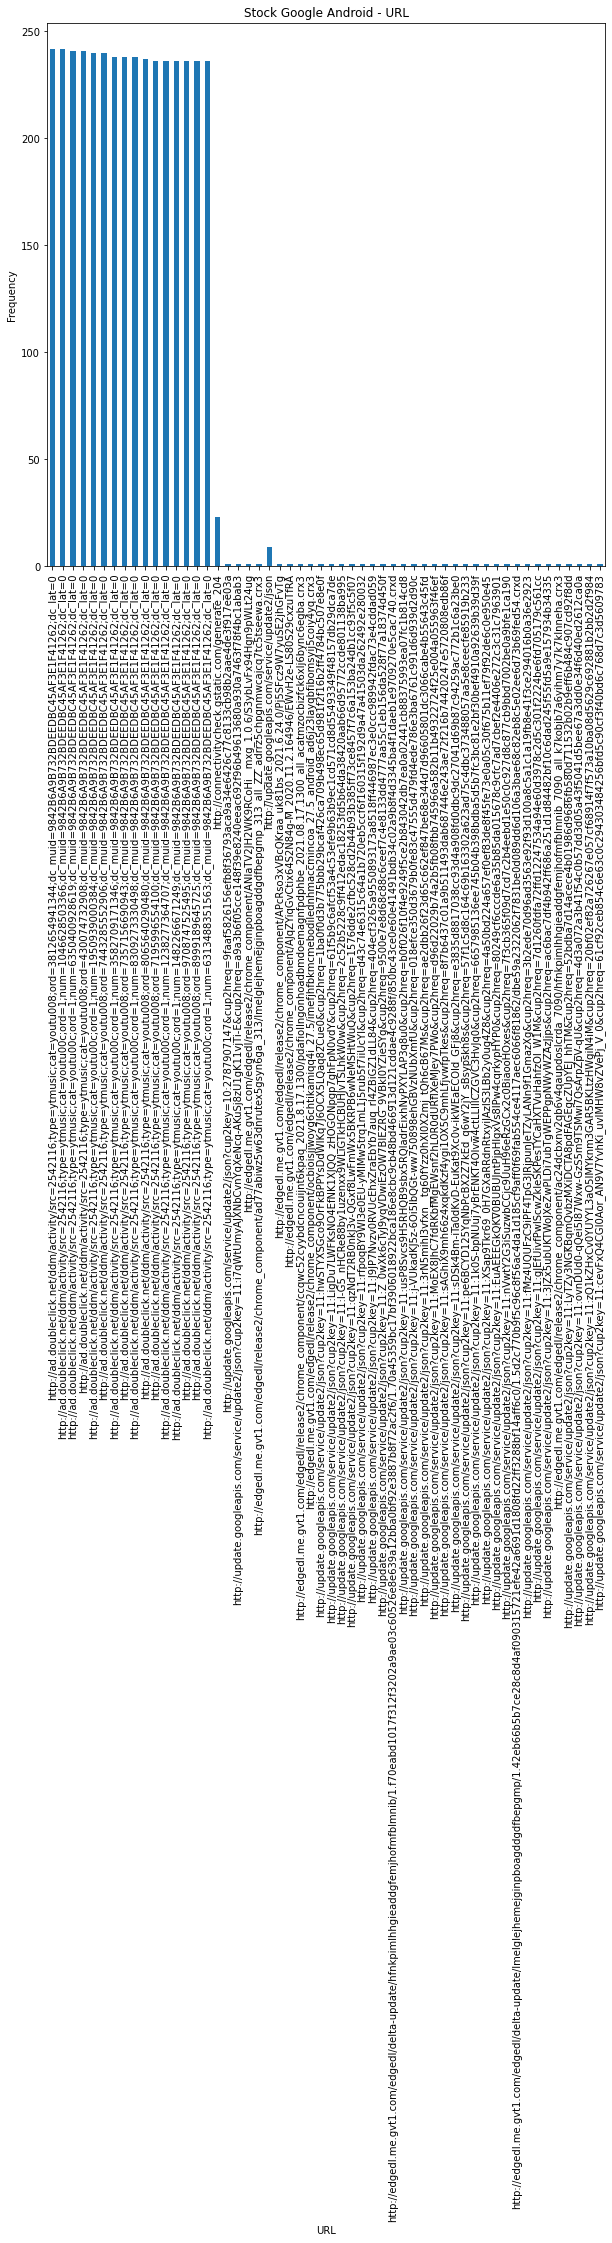

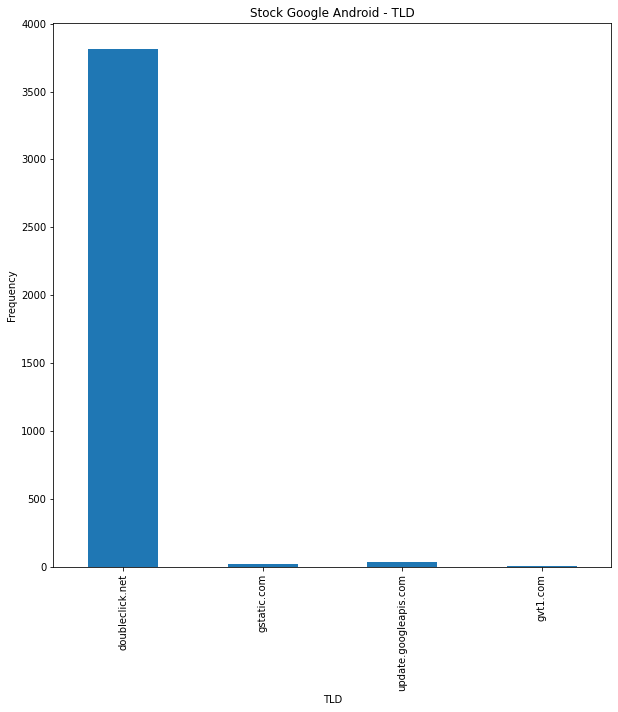

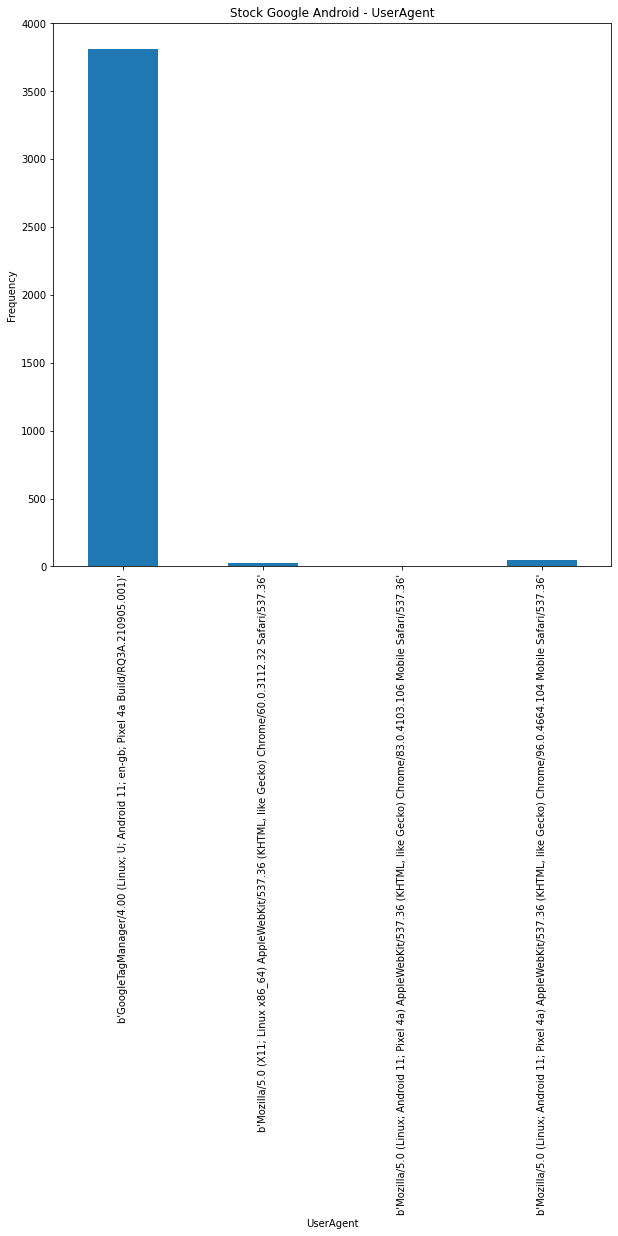

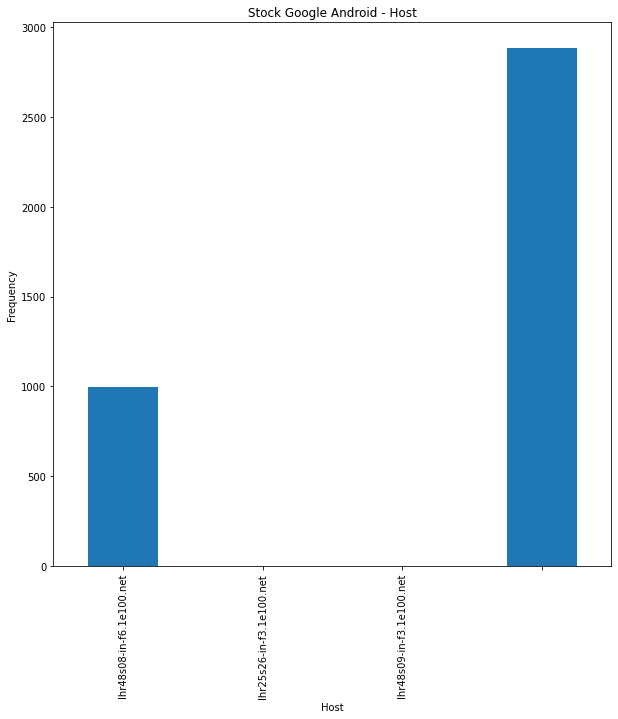

In [71]:
# Save summary file with
with open(cwd + '/Output/Stage2/Summary/' + filename + '.txt', 'w') as f:
    if constants.LOOKUP_TLD_INFO:
        # create two empty columns for Organisation and Country Info
        mitm_data['Org'] = ""
        mitm_data['Country'] = ""
    f.write(filename + ' - Summary\n')
    for column in mitm_data.columns:
        print("Processing " + column)
        f.write("\nUnique " + column)
        unique_values = mitm_data[column].unique()
        unique_values_counts = mitm_data[column].value_counts()       
        #column_df = pd.DataFrame(list(zip(unique_values, unique_values_counts))columns =[column, 'Frequency'])
        column_df = pd.DataFrame(unique_values_counts, index=unique_values)
        #print(column_df)
        iterator = 0
        while iterator < len(unique_values):
            
            f.write("\n")
            f.write(str(unique_values[iterator]))
            f.write("\t")
            f.write(str(unique_values_counts[iterator]))
            iterator += 1
        f.write("\n")
        #print(column_df)
        column_df.to_csv(cwd+"/Output/Stage2/Field_Data/"+filename+"_"+column+".csv")
        if len(unique_values) > 1:
            title_string = str(filename.replace("_"," " ) + " - " + column)
            plot = column_df.plot(kind="bar", title=title_string, figsize=(10, 10), legend=False, xlabel=column, ylabel="Frequency")
            fig=plot.get_figure()
            
            fig.savefig(cwd + "/Output/Stage2/Images/" + filename + "_" + column + "_graph.png",
                        bbox_inches='tight', dpi=600)
    f.close()

In [ ]:
tld_data = pd.DataFrame(columns=["TLD", "Org", "Country"])

for tld in tld_data_list:
    print("Looking up TLD - " + tld)
    # whois does not support the .google TLD domain
    # Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co
    # .co_il  .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl
    # .game .global_  .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me
    # .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt
    # .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre
    # .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za
    if tld == 'dns.google':
        # this is hard coded which is not ideal, but should not change
        tld_data = tld_data.append({'TLD': tld, 'Org': "Google LLC", 'Country': 'US'},
                                   ignore_index=True)
    else:
        i_count = 0
        while i_count < constants.WHOIS_LOOKUP_COUNT:
            t_sec = randrange(constants.WHOIS_LOOKUP_WAIT_MIN, constants.WHOIS_LOOKUP_WAIT_MAX)
            try:
                domain = whois.query(tld)
                tld_data = tld_data.append(
                    {'TLD': tld, 'Org': domain.registrant, 'Country': domain.registrant_country},
                    ignore_index=True)
                i_count = constants.WHOIS_LOOKUP_COUNT
            except:
                print("Error with Whois lookup. Waiting " + str(t_sec) + " seconds")
            time.sleep(t_sec)  # need a slight delay between requests for WHOIS info
            i_count += 1

In [ ]:
host_info_data = mitm_data.drop(columns=['URL', 'Metadata', 'Destination', 'Source', 'Host'])

In [ ]:
# create two empty columns for Organisation and Country Info
host_info_data['Org'] = ""
host_info_data['Country'] = ""

In [ ]:
# loop through whois info setting country and organisation data
for ind in tld_data.index:
    host_info_data.loc[host_info_data.TLD == tld_data['TLD'][ind], "Org"] = tld_data['Org'][ind]
    host_info_data.loc[host_info_data.TLD == tld_data['TLD'][ind], "Country"] = tld_data['Country'][ind]

In [ ]:
host_info_data.to_csv(cwd + "/Output/Stage2/Host_Data/" + filename + '.csv')

In [ ]:
# Generate and save User Agent graph
title_string = 'User-Agent - ' + filename 
fig = host_info_data.drop(columns=['Org', 'Country', 'TLD']).groupby('UserAgent').count().plot(kind="bar", figsize=(20,20)).get_figure()
fig.savefig(cwd + "/Output/Stage2/Images/" + filename + "_app_ graph.png", bbox_inches='tight', dpi=600)

In [ ]:
if len_user_agent > 1:
    # Generate and save User Agent pie chart
    title_string = 'User-Agent - ' + filename
    ua_count = host_info_data.drop(columns=['Application', 'Country', 'TLD' ]).groupby('UserAgent').count()
    print(ua_count)
    pie = ua_count.plot(kind="pie", title = title_string, figsize=(15,15), legend = False, use_index=False, subplots=True)
    fig2 = pie[0].get_figure()
    fig2.savefig(cwd + "/Images/" + filename + "_TLD_piegraph.png", bbox_inches='tight', dpi=1200)

In [ ]:
if len_app > 1:
    # Generate and save application graph
    title_string = 'Application - ' + filename 
    fig = host_info_data.drop(columns=['Org', 'Country', 'TLD']).groupby('Application').count().plot(kind="bar", figsize=(20,20)).get_figure()
    fig.savefig(cwd + "/Output/Stage2/Images/" + filename + "_app_ graph.png", bbox_inches='tight', dpi=600)

In [ ]:
if len_tld > 1:
    # Generate and save TLD graph
    title_string = 'Company ownership of TLD accessed - ' + filename
    fig2 = host_info_data.drop(columns=['Application','Country', 'UserAgent']).groupby('Org').count().plot(kind="bar", title=title_string, legend=False, figsize=(15,15)).get_figure()
    fig2.savefig(cwd + "/Output/Stage2//Images/" + filename + "_host_graph.png", bbox_inches='tight', dpi=1200)

    # Generate and save TLD pie chart
    title_string = 'TLD accessed - ' + filename
    tld_count = host_info_data.drop(columns=['Application', 'Country', "UserAgent" ]).groupby('TLD').count()
    pie = tld_count.plot(kind="pie", title = title_string, figsize=(15,15), legend = False, use_index=False, subplots=True)
    fig2 = pie[0].get_figure()
    fig2.savefig(cwd + "/Output/Stage2/Images/" + filename + "_TLD_piegraph.png", bbox_inches='tight', dpi=1200)

In [ ]:

# Generate and save Organisation graph
title_string = 'Company ownership of TLD accessed - ' + filename
fig3 = host_info_data.drop(columns=['Application', 'Country', "UserAgent"]).groupby('Org').count().plot(kind="bar", title = title_string, legend=False, figsize=(15,15)).get_figure()
fig3.savefig(cwd + "/Output/Stage2/Images/" + filename + "_org_graph.png", bbox_inches='tight', dpi=1200)

In [ ]:
# Generate and save organisation pie chart
title_string = 'Company ownership of TLD accessed - ' + filename
org_count = host_info_data.drop(columns=['Application', 'UserAgent', 'Country']).groupby('Org').count()
pie = org_count.plot(kind="pie", title = title_string, figsize=(15,15), legend = False, use_index=False, subplots=True)
fig4 = pie[0].get_figure()
fig4.savefig(cwd + "/Output/Stage2/Images/" + filename + "_org_piegraph.png", bbox_inches='tight', dpi=1200)